<a href="https://colab.research.google.com/github/AndreyV80/NetStudy/blob/main/%22Homework_work_versie_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os, time
from google.colab import drive
import seaborn as sns

In [2]:
drive.mount('/content/drive')    

Mounted at /content/drive


In [ ]:
# Загружаем данные в переменную df из файла homework.csv

In [4]:
df = pd.read_csv('/content/drive/My Drive/homework.csv', sep = ',')

In [ ]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [ ]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [ ]:
# Построить scatter график по параметрам crim, medv

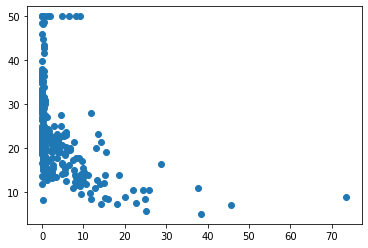

In [ ]:
plt.scatter(x='crim', y='medv', data=df)

In [ ]:
# Построить scatter график по параметрам rm, medv

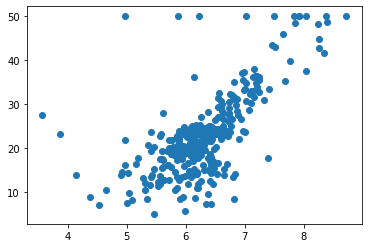

In [ ]:
plt.scatter(x='rm', y='medv', data=df)

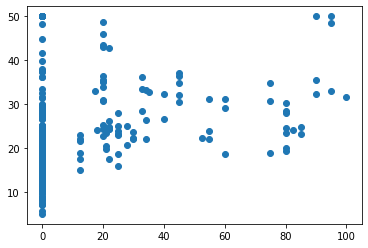

In [10]:
plt.scatter(x='zn', y='medv', data=df)

Решил для дальнейшего обучения взять не все данные, а которые более могут повлять на стоимость, имхо 

In [6]:
df_cor = df.corr()

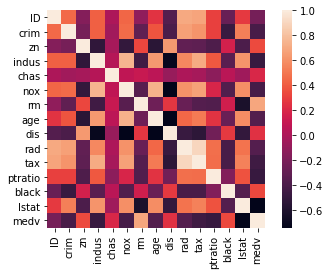

In [9]:
sns.heatmap(df_cor, square=True, robust=True )

In [5]:
df2 = df.copy()

In [ ]:
# boston = sns.load_dataset("iris")
g = sns.PairGrid(df2)
g.map(sns.scatterplot)

In [ ]:
# Сформировать X и y из df, выбрав нужные колонки

In [ ]:
df.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [18]:
# X, y = df2[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
      #  'tax', 'ptratio', 'black', 'lstat']], df2['medv']

In [9]:
# X, y = df2[['zn','chas', 'rm', 'age', 'dis', 'black']], df2['medv']

In [25]:
X, y = df2[['crim', 'rm', 'age', 'dis', 'ptratio', 'lstat']], df2['medv']

In [ ]:
# X, y = df2[['crim', 'zn', 'rm', 'age', 'dis', 'black', 'lstat']], df2['medv']

In [10]:
from sklearn.model_selection import train_test_split

In [ ]:
# Разбить данные на данные для обучения и проверки

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Создать и обучить модель LinearRegression

In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train, y_train)
print(model.intercept_)
print(model.coef_)

20.76744434364211
[-0.01817777  4.65698585 -0.03651414 -1.08502818 -0.66355904 -0.6579405 ]


In [15]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Оценить качество на тестовой выборки

In [34]:
train_predictions = model.predict(X_train) 
test_predictions = model.predict(X_test)

In [35]:
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, test_predictions))

Train MSE: 29.36482390538536
Test MSE: 21.104099453433108
Coefficient of determination: 0.74


Судя по показаниям, обучение прошло не удачно. Аналогичный результат был при обучении на основе всех показателй датафрейма. Ошибку не нашел